# sdc710

# Data Analysis

# Narrative

Your friend John asks you for some help in data analysis. He wants you to help him with a few tasks. You agreed to help him. Here's a list of questions that John needs you to answer.

1. Which type of promotion is the most popular?
2. Which type of influencer is the most popular?
3. Clean the dataset by replacing NaN values with the average of the targeted column by the influencer types.
4. Create an "Amount_Spent" column by adding the values of TV, Radio and Social Media. 
5. Create a linear regression model to predict sales in the future.
6. Predict sales for the following values:
   
   TV=23.01, Radio=11.04, Social Media=5.21, Amount_Spent=39.26
   
   TV=45.54, Radio=33.29, Social Media=4.25, Amount_Spent=83.08
   
   TV=6.69, Radio=3.12, Social Media=0.76, Amount_Spent=10.57

# Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Dataset
#### Columns
TV promotion budget (in million)

Social Media promotion budget (in million)

Radio promotion budget (in million)

Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer

Sales (in million)

In [2]:
os.chdir('C:\\Users\\sylva\\desktop\\dataset')
df=pd.read_csv('data.csv')

# Data Exploration

In [3]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,NaN,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,NaN,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4548 non-null   float64
 1   Radio         4556 non-null   float64
 2   Social Media  4550 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4551 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [5]:
df.describe()

,TV,Radio,Social Media,Sales
count,4548.000000,4556.000000,4550.000000,4551.000000
mean,53.974494,18.146878,3.315077,192.238517
std,26.081317,9.673674,2.207171,93.093743
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.517464,1.524084,112.272654
50%,53.000000,17.836506,3.048257,188.828644
75%,77.000000,25.628144,4.799072,272.299527
max,100.000000,48.871161,13.981662,364.079751


### Which type of promotion is the most popular?

In [6]:
popular_promotion=df.iloc[:,:3].sum()
popular_promotion=pd.DataFrame(popular_promotion).reset_index().rename(columns={"index": "Promotion types", 0: "Total"})
popular_promotion

,Promotion types,Total
0,TV,245476.000000
1,Radio,82677.177664
2,Social Media,15083.598326


Text(0.5, 1.0, 'Popular Types of Sales Promotion')

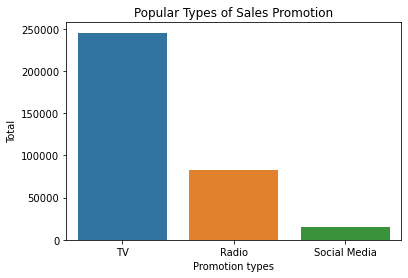

In [7]:
sns.barplot(x=popular_promotion['Promotion types'],y=popular_promotion['Total'])
plt.title("Popular Types of Sales Promotion")

Tv is the most popular type of promotion by a large margin

### Which type of influencer is the most popular?

Mega-more than a million followers

Macro-influencers with 500K to 1 million followers.

Micro-influencers with 10K to 50K followers.

Nano-influencers with 1K to 10K followers.

In [8]:
pie=df['Influencer'].value_counts()
pie

Mega     1158
Micro    1153
Nano     1139
Macro    1122
Name: Influencer, dtype: int64

Text(0.5, 1.0, 'Types of Influencer')

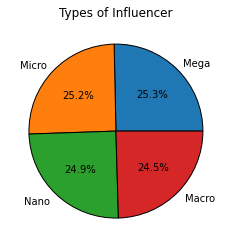

In [9]:
labels=["Mega",'Micro','Nano','Macro']
wp = {'linewidth': 1, 'edgecolor': "black"}
plt.pie(pie,labels=labels,wedgeprops=wp,autopct='%1.1f%%')
plt.title('Types of Influencer')

Mega is the most popular type of influencer by only 0.1% over Micro.

# Cleaning the data 

In [10]:
df.isnull().any()

TV               True
Radio            True
Social Media     True
Influencer      False
Sales            True
dtype: bool

<AxesSubplot:>

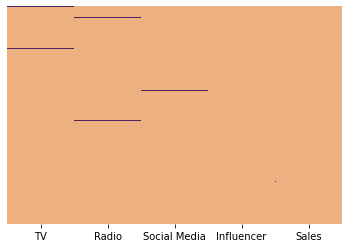

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='flare')
# NaN values are represented by the purple line 

We know that we have NaN values in columns: TV, Radio, Social Media and Sales.

In [12]:
#Find the specific number of NaN values

df[['TV','Radio','Social Media','Influencer','Sales']].isna().sum() 

TV              24
Radio           16
Social Media    22
Influencer       0
Sales           21
dtype: int64

### TV

We will replace the NaN values of TV  by the average of the TV column base on the types of influencer (Q3)


In [13]:
# find the average of TV by influencer types 
df.groupby(['Influencer']).mean()['TV']

Influencer
Macro    54.875899
Mega     53.474459
Micro    53.698080
Nano     53.879295
Name: TV, dtype: float64

In [14]:
# Function to replace tv NaN with the number above
def replace_nan_tv(x):
    TV=x[0]
    Influencer=x[1]
    if pd.isnull(TV):
        if Influencer == 'Macro':
            return 54.875899
        elif Influencer == 'Mega':
            return 53.474459
        elif Influencer == 'Micro':
            return 53.698080
        elif Influencer == 'Nano':
            return 53.879295
    else:
        return TV

In [15]:
#Applying the function to replace NaN of TV
df['TV']=df[['TV','Influencer']].apply(replace_nan_tv, axis=1)

### Radio

Same steps done in TV will be apply for the remaning columns with NaN

In [16]:
df.groupby(['Influencer']).mean()['Radio']

Influencer
Macro    18.328152
Mega     18.061388
Micro    18.193308
Nano     18.008752
Name: Radio, dtype: float64

In [17]:
def replace_nan_radio(x):
    radio=x[0]
    Influencer=x[1]
    if pd.isnull(radio):
        if Influencer == 'Macro':
            return 18.328152
        elif Influencer == 'Mega':
            return 18.061388
        elif Influencer == 'Micro':
            return 18.193308
        elif Influencer == 'Nano':
            return 18.008752
    else:
        return radio

In [18]:
df['Radio']=df[['Radio','Influencer']].apply(replace_nan_radio, axis=1)

### Social Media

In [19]:
df.groupby(['Influencer']).mean()['Social Media']

Influencer
Macro    3.358290
Mega     3.368573
Micro    3.256635
Nano     3.277330
Name: Social Media, dtype: float64

In [20]:
def replace_nan_sm(x):
    sm=x[0]
    Influencer=x[1]
    if pd.isnull(sm):
        if Influencer == 'Macro':
            return 3.358290
        elif Influencer == 'Mega':
            return 3.368573
        elif Influencer == 'Micro':
            return 3.256635
        elif Influencer == 'Nano':
            return 3.277330
    else:
        return sm

In [21]:
df['Social Media']=df[['Social Media','Influencer']].apply(replace_nan_sm, axis=1)

### Sales

In [22]:
df.groupby(['Influencer']).mean()['Sales']

Influencer
Macro    195.527444
Mega     190.490778
Micro    191.669353
Nano     191.351524
Name: Sales, dtype: float64

In [23]:
def replace_nan_sales(x):
    sales=x[0]
    Influencer=x[1]
    if pd.isnull(sales):
        if Influencer == 'Macro':
            return 195.527444
        elif Influencer == 'Mega':
            return 190.490778
        elif Influencer == 'Micro':
            return 191.669353
        elif Influencer == 'Nano':
            return 191.351524
    else:
        return sales

In [24]:
df['Sales']=df[['Sales','Influencer']].apply(replace_nan_sales, axis=1)

# Verification

In [25]:
df.isnull().any()

TV              False
Radio           False
Social Media    False
Influencer      False
Sales           False
dtype: bool

<AxesSubplot:>

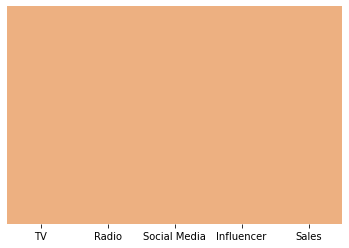

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='flare')

Successfully cleaned the dataset since there are no longer any NaN values.

# Amount_Spent column
Amount_Spent column is the total amount spent on promotion. In other words, it is the sum of TV, Radio and Social Media.

In [27]:
# Current dataset
df

,TV,Radio,Social Media,Influencer,Sales
0,16.000000,6.566231,2.907983,Mega,54.732757
1,13.000000,9.237765,2.409567,Mega,46.677897
2,41.000000,15.886446,2.913410,Mega,150.177829
3,53.474459,30.020028,6.922304,Mega,298.246340
4,15.000000,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.000000,4.472360,0.717090,Micro,94.685866
4568,71.000000,20.610685,3.277330,Nano,249.101915
4569,44.000000,19.800072,5.096192,Micro,163.631457
4570,71.000000,17.534640,1.940873,Macro,253.610411


In [28]:
df['Amount_Spent']=df.iloc[:,:3].sum(axis=1)

In [29]:
# New dataset with budget
df

,TV,Radio,Social Media,Influencer,Sales,Amount_Spent
0,16.000000,6.566231,2.907983,Mega,54.732757,25.474214
1,13.000000,9.237765,2.409567,Mega,46.677897,24.647332
2,41.000000,15.886446,2.913410,Mega,150.177829,59.799856
3,53.474459,30.020028,6.922304,Mega,298.246340,90.416791
4,15.000000,8.437408,1.405998,Micro,56.594181,24.843406
...,...,...,...,...,...,...
4567,26.000000,4.472360,0.717090,Micro,94.685866,31.189450
4568,71.000000,20.610685,3.277330,Nano,249.101915,94.888015
4569,44.000000,19.800072,5.096192,Micro,163.631457,68.896264
4570,71.000000,17.534640,1.940873,Macro,253.610411,90.475514


# Linear regression model

We are trying to predict future sales.

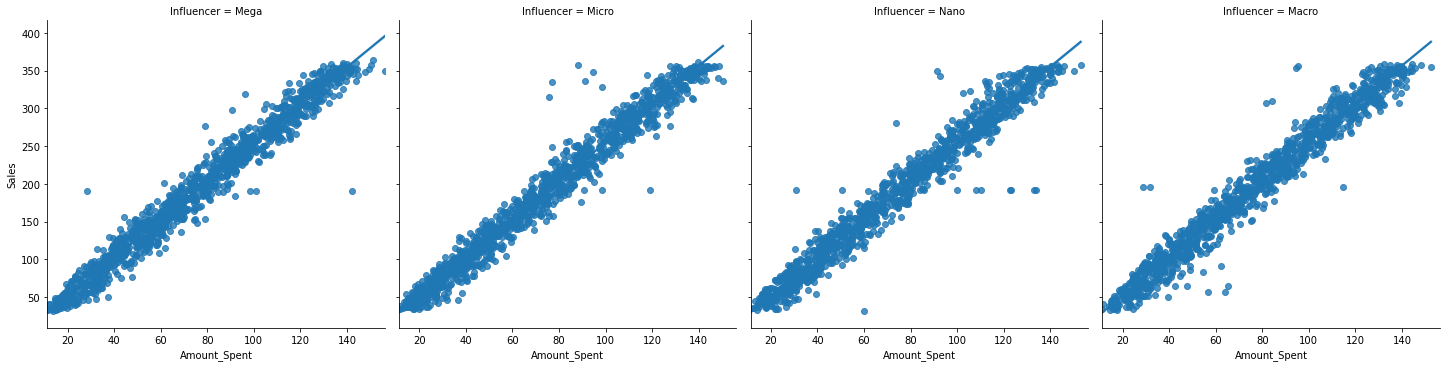

In [30]:
# predict sales using budget
sns.lmplot(x='Amount_Spent',y='Sales',col='Influencer',data=df)

From the graph, there is a strong correlation and  the types of influencer does not matter as it yield the same results

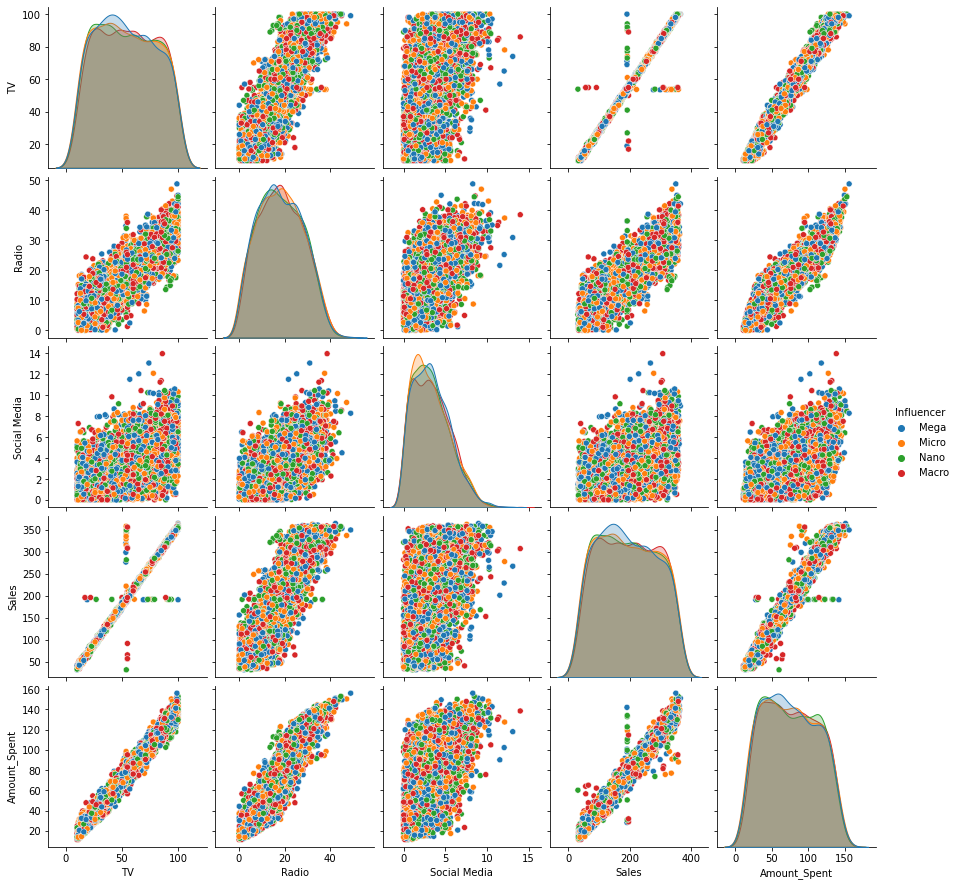

In [31]:
# Compare every columns with each other, there is a positive correlation in every comparison
sns.pairplot(df, hue='Influencer')

### Train/test split
Training set data is use to train the model (X_train and y_train)

Testing set data is use to verify the accuracy of the model (X_test and y_test)

In [32]:
X=df[['TV','Radio','Social Media','Amount_Spent']] # help us create our model
y=df['Sales'] # What we are trying to predict
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=101) 

### Create the model
We create the linear regression model and we train it using the training set data

In [33]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### Predict
passing the x_test (value the model has never seen) to be evaluated by the model

Comparing y_test(correct values) with predictions (model)

If we have graph showing a linear regression, it shows that our model is good

Text(0.5, 1.0, 'Comparing y_test and Predictions')

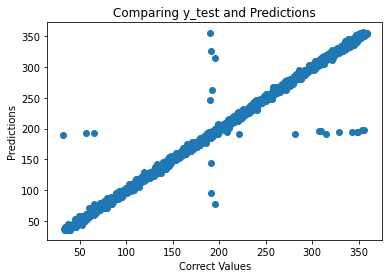

In [34]:
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions) 
plt.xlabel('Correct Values')
plt.ylabel('Predictions')
plt.title('Comparing y_test and Predictions')

We have a strong relationship but we also have a couple of outliers

### Evaluate the model

Root Mean Squared Error (RMSE)

This metric is a loss functions because we want to minimize it.

In [35]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 13.980929660206973


# Predicting sales with given values

Prediction 1: TV=23.01, Radio=11.04, Social Media=5.21, Amount_Spent=39.26

Prediction 2: TV=45.54, Radio=33.29, Social Media=4.25, Amount_Spent=83.08

Prediction 3: TV=6.69, Radio=3.12, Social Media=0.76, Amount_Spent=10.57

In [36]:
prediction1=lr.predict([[23.01,11.04,5.21,39.26]]).item()
prediction2=lr.predict([[45.54,33.29,4.25,83.08]]).item()
prediction3=lr.predict([[6.69,3.12,0.76,10.57]]).item()
print(f'Using our linear regression model to forecast sales, the value of the first prediction would be {prediction1}.\nThe value of sales for the second prediction would be {prediction2}.\nLastly, the value of sales for the third and last prediction would be {prediction3}.')

Using our linear regression model to forecast sales, the value of the first prediction would be 83.23208465405047.
The value of sales for the second prediction would be 165.02996631229786.
Lastly, the value of sales for the third and last prediction would be 24.562376019828804.
